<a href="https://colab.research.google.com/github/nirvika28/titanic_prede/blob/main/titanicsurvivalpred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [4]:
import zipfile

# Path to the ZIP file
zip_path = '/content/titanic.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/titanic')


In [6]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# Load the CSV files
train_data = pd.read_csv('/content/titanic/train.csv')
test_data = pd.read_csv('/content/titanic/test.csv')
gender_submission = pd.read_csv('/content/titanic/gender_submission.csv')

# Data Preprocessing
def preprocess_data(df):
    # Fill missing values
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convert categorical columns to numerical
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    # Drop irrelevant columns
    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True, errors='ignore')

    return df

# Preprocess training and test data
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)

# Split the training data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation data
y_pred = model.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred))

# Make predictions on the test set
test_predictions = model.predict(test_data)

# Save predictions for submission
output = pd.DataFrame({
    'PassengerId': gender_submission['PassengerId'],  # Use PassengerId from gender_submission.csv
    'Survived': test_predictions
})
output.to_csv('titanic_predictions.csv', index=False)
print("Predictions saved to 'titanic_predictions.csv'")


<ipython-input-6-27d4ae575f52>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-6-27d4ae575f52>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

Validation Accuracy: 0.8156424581005587
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Predictions saved to 'titanic_predictions.csv'


In [7]:
# Check the first few rows of each dataset
print(train_data.head())
print(test_data.head())

# Check for missing values
print(train_data.isnull().sum())
print(test_data.isnull().sum())



   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    0  22.0      1      0   7.2500         2
1         1       1    1  38.0      1      0  71.2833         0
2         1       3    1  26.0      0      0   7.9250         2
3         1       1    1  35.0      1      0  53.1000         2
4         0       3    0  35.0      0      0   8.0500         2
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         1
1       3    1  47.0      1      0   7.0000         2
2       2    0  62.0      0      0   9.6875         1
3       3    0  27.0      0      0   8.6625         2
4       3    1  22.0      1      1  12.2875         2
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64


In [10]:
from sklearn.metrics import classification_report, confusion_matrix
# Evaluate the model on training data
train_predictions = model.predict(X_train)

print("Confusion Matrix (Training Data):\n", confusion_matrix(y_train, train_predictions))
print("\nClassification Report (Training Data):\n", classification_report(y_train, train_predictions))



Confusion Matrix (Training Data):
 [[441   3]
 [ 12 256]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       444
           1       0.99      0.96      0.97       268

    accuracy                           0.98       712
   macro avg       0.98      0.97      0.98       712
weighted avg       0.98      0.98      0.98       712



In [11]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Accuracy Scores: [0.81118881 0.74825175 0.81690141 0.77464789 0.81690141]
Mean CV Accuracy: 0.7935782527331823


In [12]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [14]:
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Score: 0.8356347877474637


In [15]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [16]:
y_val_pred = best_model.predict(X_val)
print("Validation Accuracy (Tuned Model):", accuracy_score(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy (Tuned Model): 0.8212290502793296
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.91      0.86       105
           1       0.85      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [17]:
test_predictions = best_model.predict(test_data)

# Save predictions
output = pd.DataFrame({
    'PassengerId': gender_submission['PassengerId'],  # Ensure PassengerId matches the test data
    'Survived': test_predictions
})
output.to_csv('titanic_predictions_tuned.csv', index=False)
print("Tuned Predictions saved to 'titanic_predictions_tuned.csv'")


Tuned Predictions saved to 'titanic_predictions_tuned.csv'


In [25]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)

y_val_pred = xgb_model.predict(X_val)
print("XGBoost Model Accuracy:", accuracy_score(y_val, y_val_pred))


XGBoost Model Accuracy: 0.8100558659217877


In [27]:
!pip install xgboost


In [28]:
from xgboost import XGBClassifier


In [31]:
# Import the necessary libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Create the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model
print("XGBoost Accuracy:", accuracy_score(y_val, y_val_pred))


XGBoost Accuracy: 0.7932960893854749


In [33]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression


In [35]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[
        ('xgb',xgb_model),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
        ('lr', LogisticRegression())
    ],
    voting='soft'  # Use probabilities for ensemble
)

ensemble_model.fit(X_train, y_train)
y_val_pred = ensemble_model.predict(X_val)
print("Ensemble Model Accuracy:", accuracy_score(y_val, y_val_pred))


Ensemble Model Accuracy: 0.8156424581005587


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


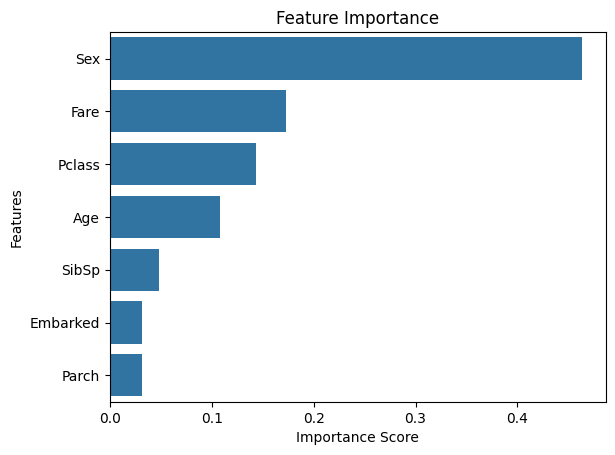

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance
feature_importance = pd.Series(best_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()
